In [ ]:
from google.colab import drive
drive.mount('/content/drive')

169001437/169001437 [==============================] - 10s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


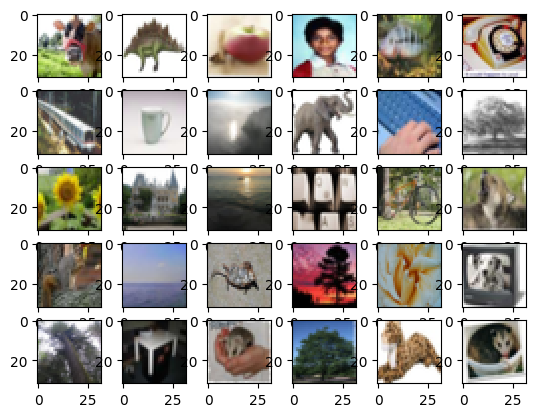

In [1]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np
(x_train, y_train),(x_test,y_test) = cifar100.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

for i in range(30):
  plt.subplot(5,6,i+1)
  plt.imshow(x_train[i])
plt.show()

In [2]:
x_train = x_train.reshape(50000, 32*32*3)
x_train = x_train.astype('float32')/255
print(x_train.shape)

x_test = x_test.reshape(10000, 32*32*3)
x_test = x_test.astype('float32')/255
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [3]:
from keras.utils import to_categorical #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
y_train = to_categorical (y_train,100)
y_test = to_categorical(y_test,100)

print(y_train.shape) 
print(y_test.shape)

(50000, 100)
(10000, 100)


In [4]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1000 , activation = 'relu', input_shape = (32*32*3,)))
model.add(Dense(300 , activation = 'relu'))
model.add(Dense(200 , activation = 'relu'))
model.add(Dense(100 , activation = 'relu'))
# model.add(Dense(100 , activation = 'relu'))
model.add(Dense(100 , activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              3073000   
                                                                 
 dense_1 (Dense)             (None, 300)               300300    
                                                                 
 dense_2 (Dense)             (None, 200)               60200     
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
Total params: 3,463,700
Trainable params: 3,463,700
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Độ chính xác trên tập kiểm tra:',test_acc)
print('Hàm mất mát trên tập kiểm tra:',test_loss)

Epoch 1/10
391/391 [==============================] - 33s 82ms/step - loss: 4.3278 - accuracy: 0.0443
Epoch 2/10
391/391 [==============================] - 27s 68ms/step - loss: 3.9361 - accuracy: 0.0952
Epoch 3/10
391/391 [==============================] - 28s 72ms/step - loss: 3.7369 - accuracy: 0.1268
Epoch 4/10
391/391 [==============================] - 32s 82ms/step - loss: 3.6092 - accuracy: 0.1500
Epoch 5/10
391/391 [==============================] - 28s 71ms/step - loss: 3.5044 - accuracy: 0.1667
Epoch 6/10
391/391 [==============================] - 26s 66ms/step - loss: 3.4132 - accuracy: 0.1836
Epoch 7/10
391/391 [==============================] - 25s 64ms/step - loss: 3.3383 - accuracy: 0.1963
Epoch 8/10
391/391 [==============================] - 26s 67ms/step - loss: 3.2821 - accuracy: 0.2068
Epoch 9/10
391/391 [==============================] - 27s 69ms/step - loss: 3.2156 - accuracy: 0.2181
Epoch 10/10
313/313 [==============================] - 3s 9ms/step - loss: 3.3601 

In [7]:
model.save('/content/sample_data/cfar100_2.h5')

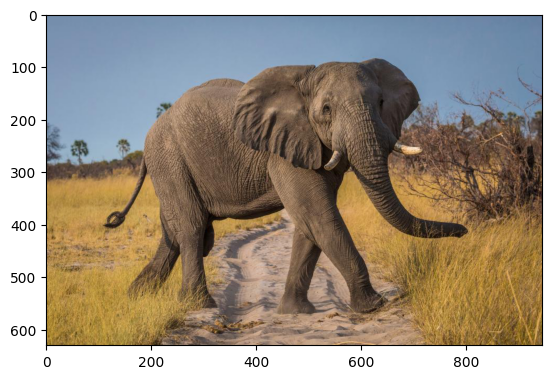

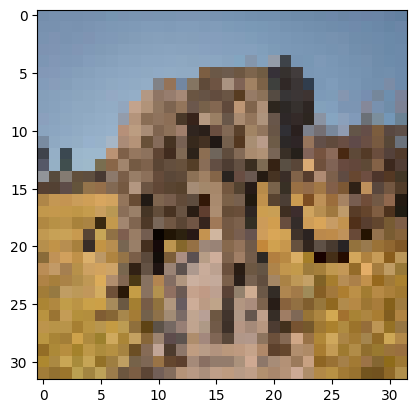

1/1 [==============================] - 0s 151ms/step


array([89])

In [9]:
from keras.models import load_model
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

model100 = load_model('/content/sample_data/cfar100_2.h5')
img = load_img('/content/drive/MyDrive/Colab Notebooks/AI_Projects/Data/elephant.jpg')
plt.imshow(img)
plt.show()

img = load_img('/content/drive/MyDrive/Colab Notebooks/AI_Projects/Data/elephant.jpg', target_size=(32,32))
plt.imshow(img)
plt.show()

img = img_to_array(img)
img = img.reshape(1, 32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model100.predict(img), axis=-1)